# Day 63 – Chunking in NLP and LLMs


In the previous sessions, I learned how to preprocess and represent text using various embedding techniques. Now, I’ll explore how to extract meaningful phrases or groups of words from text — a process known as Chunking.

Chunking helps break down text into structured units that carry specific grammatical meaning, which is essential for tasks like question answering, named entity recognition, and information extraction.

Chunking is a powerful technique used to divide text into meaningful segments. The term "chunking" has two distinct meanings in the world of language processing: one related to grammar (**NLP**) and one related to efficiency (**LLMs**).

---

## 1. Chunking in Traditional NLP (Syntactic Analysis)

In traditional **Natural Language Processing (NLP)**, chunking (or shallow parsing) refers to the process of dividing text into **meaningful segments** called "chunks". These chunks often correspond to **syntactic structures** in a sentence, such as noun phrases or verb phrases.

The main goal here is to help the machine understand the **grammatical structure** of the sentence.

### Types of Chunks

Chunking identifies groups of words that function together as a single unit:

* **Noun Phrases (NP):** Groups of words that function as a noun (e.g., "the big red ball").
* **Verb Phrases (VP):** Consist of the main verb and any accompanying words (e.g., "is running quickly").
* **Prepositional Phrases (PP):** Phrases that start with a preposition (e.g., "under the table").

#### Why Chunking is Used in NLP

| Area | Purpose |
| :--- | :--- |
| **Syntactic Analysis** | It helps understand the grammatical structure of sentences by identifying phrases. |
| **Information Extraction** | By isolating key phrases (like names and places), chunking facilitates the extraction of relevant information from text. |
| **Question Answering** | It helps to extract the precise information needed to answer a query. |
| **Text Parsing** | It provides an intermediate step for understanding sentence structure for further, more detailed processing. |

#### Example of Chunking

For the sentence *"The quick brown fox jumps over the lazy dog,"* chunking would identify:
* **Noun Phrase (NP):** "The quick brown fox" 
* **Verb Phrase (VP):** "jumps" 
* **Prepositional Phrase (PP):** "over the lazy dog" 

---


In [1]:
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

# Download required models only onces
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# Sample text
text = "The quick brown fox jumps over the lazy dog."

In [3]:
# Tokenize
tokens = word_tokenize(text)

In [4]:
# POS Tagging
tagged_tokens = pos_tag(tokens)

In [5]:
print(tagged_tokens)

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


In [6]:
# Define a chunk grammar
chunk_grammar = r"""
  NP: {<DT>?<JJ>*<NN>}   # Noun Phrase
  VP: {<VB.*><NP|PP>*}    # Verb Phrase
  PP: {<IN><NP>}          # Prepositional Phrase
"""

In [7]:
# Create a chunk parser
chunk_parser = RegexpParser(chunk_grammar)

In [8]:
# Parse the tagged tokens
chunked = chunk_parser.parse(tagged_tokens)

In [9]:
# Print the chunked output
print(chunked)

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  (VP jumps/VBZ)
  (PP over/IN (NP the/DT lazy/JJ dog/NN))
  ./.)


In [ ]:
## Chunking Visualization (NLTK Output)
chunked.draw()

# Chunking Visualization (NLTK Output)
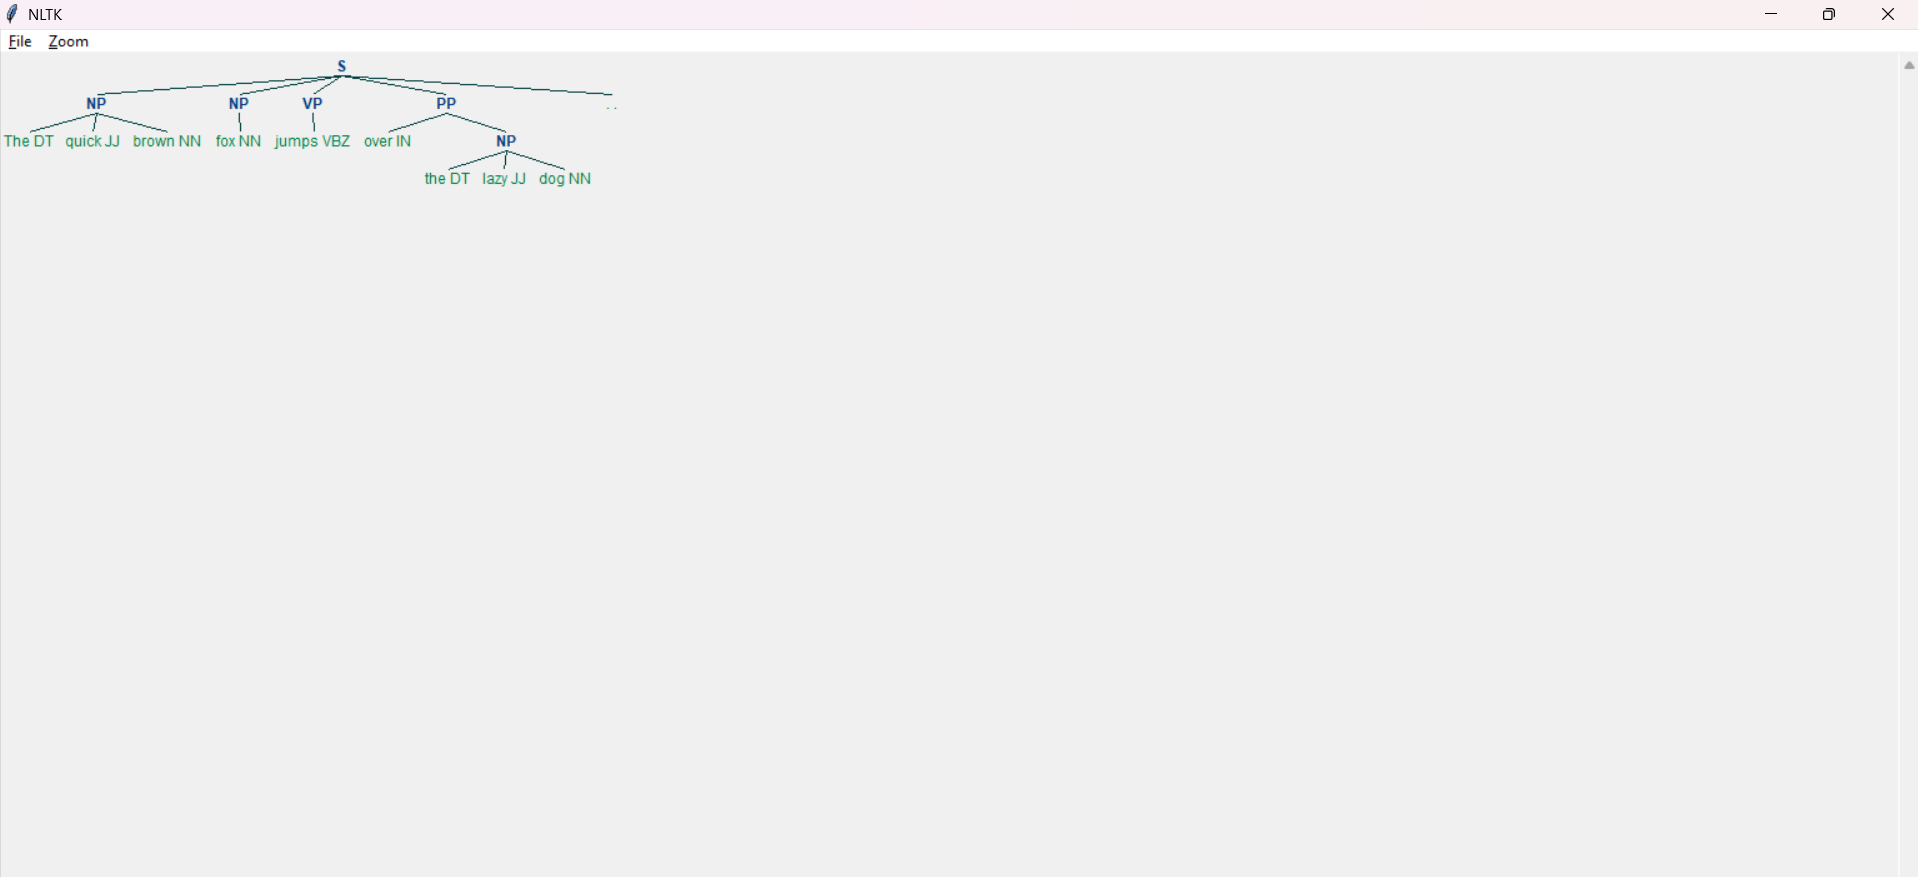

---
## 2. Chunking in Large Language Models (LLMs)

In the context of **Large Language Models (LLMs)** (like GPT or LLaMA), **chunking** is an entirely different strategy focused on **efficiency** and **context management**. It refers to the method of processing input text in **smaller, manageable segments** rather than processing a massive block all at once.

#### Why Chunking is Critical for LLMs

1.  **Handling Long Documents:** LLMs often have a **maximum token limit** (the amount of text they can process in one go). Chunking breaks down very long texts into manageable parts that fit within this limit.
2. **Efficiency and Memory:** Processing smaller chunks helps to improve computational efficiency and manages memory usage, especially during parallel processing.
3.  **Context Management:** By processing short segments, the model can **maintain context better** for those segments, which is key for improving coherence in text generation and summarization.
4.  **Attention Mechanism:** In transformer models, the attention mechanism operates over fixed-length sequences. Chunking allows the model to attend to relevant parts of the input without being overwhelmed.

#### Applications in LLMs

| Application | Benefit of Chunking |
| :--- | :--- |
| **Information Retrieval** |Processing sections individually to retrieve specific information from large datasets. |
| **Summarization** | Breaking down a long document into digestible pieces for focused analysis. |
| **Text Generation** | Generating text in parts to help maintain thematic or narrative consistency. |

In summary, chunking in LLMs is a **strategy** to enhance the processing efficiency and effectiveness of large or complex datasets , while chunking in traditional NLP is a **syntactic technique** to understand grammar and meaning.

In [ ]:
## Note on Running LLM Chunking on CPU

- GPT-2 and similar models are large, so running them on CPU may cause **out-of-memory** or **very slow performance**.  
- To avoid errors:  
  - Use smaller models like **distilgpt2**.  
  - Explicitly load the model on CPU.  
  - Keep `max_length` small (like 50–100).  

## Running Larger LLMs on **Google Colab (GPU)**

### This section contains the practical experiments performed in Google Colab

## Setting Up the Environment

Before starting with transformers, let’s check the GPU availability and install the required library.

```python
!nvidia-smi
```

```python
!pip install transformers
```

### Explanation:

* **`nvidia-smi`** – Displays GPU details if available (used in Google Colab or systems with GPU support).
* **`pip install transformers`** – Installs the Hugging Face Transformers library, which provides pre-trained models for various NLP and LLM tasks such as text generation, translation, and summarization.

---

## Understanding Transformer Models

The **Transformer architecture** changed the field of NLP completely after its introduction in 2017 by Vaswani et al. in the paper *“Attention Is All You Need.”*

Below are some popular Transformer-based models:

1. **BERT (Bidirectional Encoder Representations from Transformers)** – understands context from both directions using *masked language modeling*.
2. **GPT (Generative Pre-trained Transformer)** – used for *text generation* (e.g., ChatGPT).
3. **T5 (Text-to-Text Transfer Transformer)** – treats every NLP task as a *text-to-text* task.
4. **RoBERTa** – a better-trained version of BERT with more data and optimization.
5. **XLNet** – combines the best of BERT and autoregressive models.
6. **ALBERT** – a smaller, faster version of BERT.
7. **DistilBERT** – a lightweight version of BERT that runs faster.
8. **ERNIE** – adds external knowledge to understand text better.
9. **ELECTRA** – predicts replaced tokens instead of masked ones for better efficiency.
10. **DeBERTa** – improves attention mechanisms for better results.
11. **Vision Transformer (ViT)** – uses transformer architecture for image tasks.
12. **BART** – combines BERT (understanding) and GPT (generation) concepts.

---

## Tokenization Example (GPT-2)

This example shows how text is converted into tokens that models can understand.

```python
from transformers import AutoTokenizer

# Load the tokenizer for a specific model (e.g., GPT-2)
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Tokenize input text
text = "Hello, how are you?"
tokens = tokenizer(text, return_tensors='pt')
print(tokens)
```

### Output:

```text
{'input_ids': tensor([[15496, 11, 703, 389, 345, 30]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
```

### Explanation:

* The **input text** `"Hello, how are you?"` is converted into token IDs.
* **`input_ids`**: Numerical representations of each token.
* **`attention_mask`**: Indicates which tokens should be processed (1 = real token, 0 = padding).
* These outputs are used as input to transformer models.

---

## Text Generation Using GPT-2

This example shows how GPT-2 generates text from a given prompt.

```python
from transformers import AutoModelForCausalLM

# Load the pre-trained GPT-2 model
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Generate text
input_ids = tokenizer.encode("Once upon a time", return_tensors='pt')
output = model.generate(input_ids, max_length=40)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text)
```

### Output:

```text
The attention mask and the pad token id were not set...
Once upon a time, the world was a place of great beauty and great danger...
```

### Explanation:

* **Model Loading**: Loads a pre-trained GPT-2 model.
* **Tokenization**: Converts the prompt `"Once upon a time"` into model-readable input IDs.
* **Text Generation**: Uses `model.generate()` to create a continuation up to `max_length=40` tokens.
* **Decoding**: Converts the generated tokens back into human-readable text.
* The warning about `attention_mask` can be ignored for simple demonstrations.

---

## Implementing Text Chunking for Long Inputs

Here we chunk long text into smaller parts so models can handle it efficiently.

```python
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load a pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def chunk_text(text, max_length=512):
    """Chunk text into smaller pieces."""
    tokens = tokenizer.encode(text, return_tensors='pt')[0]
    chunks = []

    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        chunks.append(chunk)

    return chunks

def generate_responses(chunks):
    """Generate responses for each chunk using the model."""
    responses = []
    for chunk in chunks:
        input_ids = chunk.unsqueeze(0)
        output = model.generate(input_ids, max_length=512)
        responses.append(tokenizer.decode(output[0], skip_special_tokens=True))
    return responses

# Example long text
long_text = "brief explain about generative ai " * 50

# Chunk the text
chunks = chunk_text(long_text)

# Generate responses
responses = generate_responses(chunks)

for i, response in enumerate(responses):
    print(f"Response for chunk {i+1}:\n{response}\n")
```

### Explanation:

* **Model and Tokenizer**: Loads GPT-2 and its tokenizer.
* **Chunking**: The `chunk_text()` function splits long input text into smaller token chunks.
* **Response Generation**: Each chunk is processed individually by the model using `generate()`.
* **Output**: You’ll see responses for each chunk, demonstrating how to handle long text inputs without exceeding model limits.
* **Note**: For real-world tasks, consider overlapping chunks slightly to maintain context between them.

---

## Chunking with BERT Tokenizer

This example uses BERT’s tokenizer to divide text into small chunks of tokens.

```python
from transformers import AutoTokenizer

# Load a tokenizer (using BERT for example)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Sample large text
text = """Natural Language Processing (NLP) is a subfield of Artificial Intelligence
that focuses on the interaction between computers and humans through language."""

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Define chunk size
chunk_size = 10

# Create chunks
chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]

# Display the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk}\n")
```
### Output:

```text
Chunk 1: ['natural', 'language', 'processing', '(', 'nl', '##p', ')', 'is', 'a', 'sub']

Chunk 2: ['##field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between']

Chunk 3: ['computers', 'and', 'humans', 'through', 'language', '.']
```

### Explanation:

* The **tokenizer** splits text into small tokens.
* We then divide these tokens into groups (chunks) of size `10`.
* This technique helps when processing large documents in NLP tasks like summarization or document retrieval.

---

## Using Transformer Pipelines for Text Analysis

Now, let’s apply a transformer model for a simple text analysis task like **sentiment analysis**.

```python
from transformers import pipeline

# Load a sentiment-analysis pipeline
nlp = pipeline("sentiment-analysis")

# Apply the model to sample text
result = nlp("Chunking helps language models understand long documents better.")
print(result)
```

### Output:

```text
[{'label': 'POSITIVE', 'score': 0.8838077187538147}]
```

### Explanation:

* The **pipeline()** function provides a ready-to-use interface for NLP tasks.
* We use the *sentiment-analysis* model to predict whether text expresses a positive, negative, or neutral sentiment.
* The result includes both the label and the confidence score.

---

## Summary

In this section, I covered:

* How to install and set up the Transformers library
* The basics of Transformer models
* How tokenization and text generation work in GPT-2
* How to handle large text inputs using chunking
* Performing text analysis using pre-trained models

This gives you a strong foundation in **working with NLP and LLMs using Transformers**.

---


## Conclusion

This notebook provided a detailed understanding of **Chunking**, emphasizing its two significant interpretations in the field of Natural Language Processing.

I successfully distinguished between:

1. **Chunking in Traditional NLP** – a **syntactic technique** used for *shallow parsing*, where text is divided into meaningful phrases like **Noun Phrases (NP)** and **Verb Phrases (VP)** to better understand sentence structure.
2. **Chunking in LLMs (Large Language Models)** – an **efficiency and context management strategy** used to handle long documents that exceed the model’s **context window**. This ensures that large texts can be processed effectively without losing context.

Overall, this session helped build a clear understanding of how **chunking plays a vital role** in both **structural language analysis** and **efficient text handling** in modern NLP applications.

---

### Key Learning

* Understood the dual meaning of chunking in **traditional NLP** and **LLMs**.
* Learned how **chunking improves efficiency and preserves context** when working with long text data.
* Implemented practical examples using **transformer models** to perform tokenization, text generation, and chunking.
